In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
zero_counts = (df == 0).sum()
zero_counts

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#### Shows how many zeros are present in each column.
#### Zeros in medical data (glucose, BP, insulin) usually indicate missing values.

In [31]:
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [32]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)
df = df.drop_duplicates()

Number of duplicate rows: 0


In [33]:
df.fillna(df.median(), inplace=True)
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

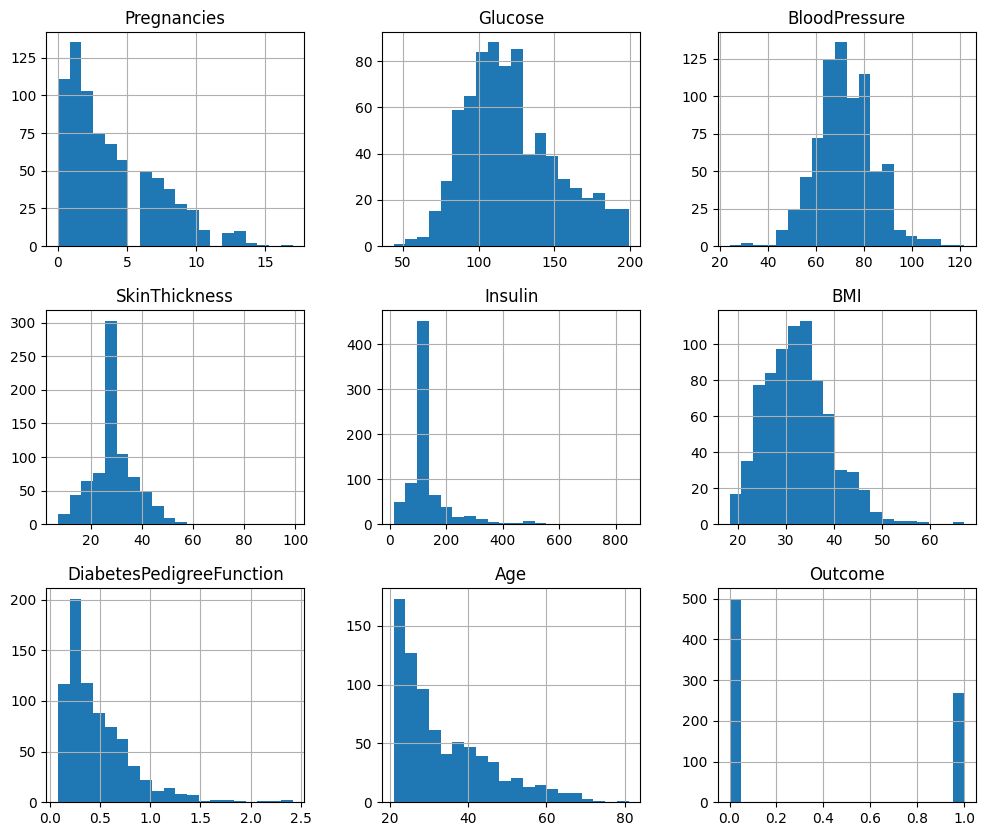

In [34]:
df.hist(figsize=(12,10), bins=20)
plt.show()

#### Histogram for each variable - helps detect skewness, outliers, abnormalities.

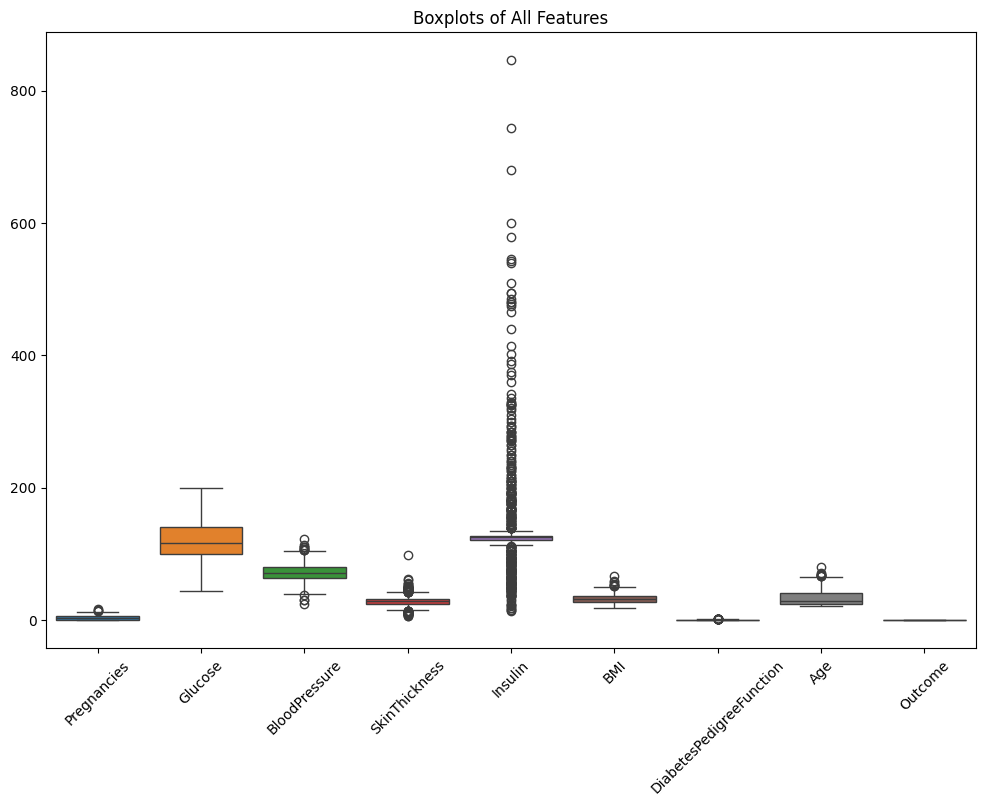

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots of All Features")
plt.show()

#### Helps visually detect extreme values (especially Insulin & SkinThickness).

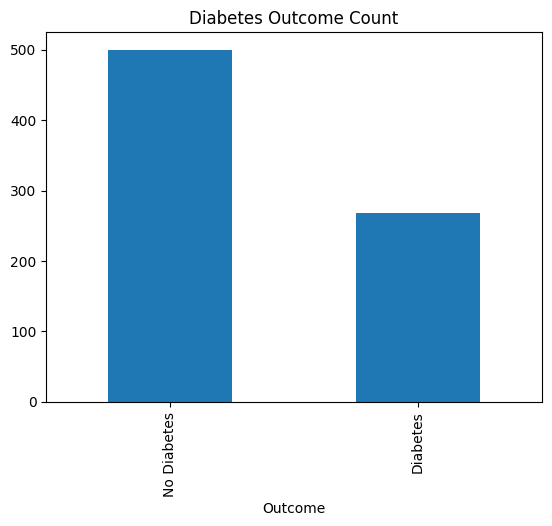

In [36]:
df['Outcome'].value_counts().plot(kind='bar')
plt.title("Diabetes Outcome Count")
plt.xticks([0,1], ["No Diabetes", "Diabetes"])
plt.show()

#### Shows whether the dataset is imbalanced ( 65% no diabetes, 35% diabetes).

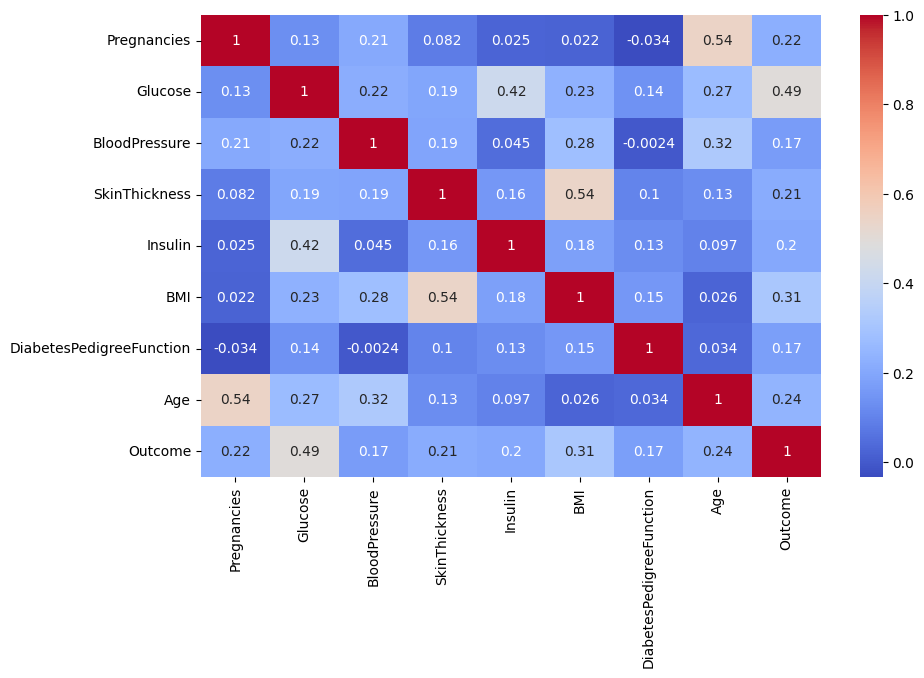

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


#### Glucose has highest correlation with diabetes outcome.
#### BMI, Age, and Pregnancies also important.

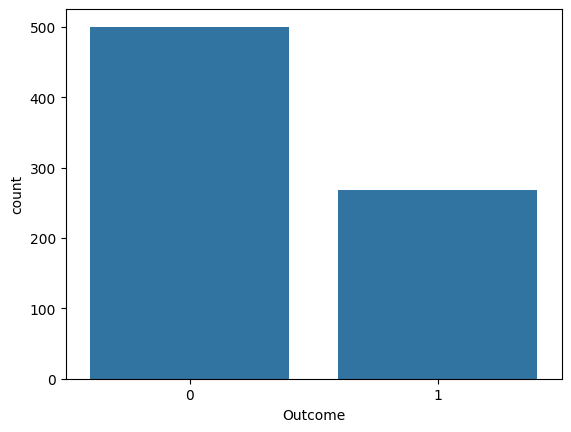

In [38]:
df['Outcome'].value_counts()
sns.countplot(x="Outcome", data=df)
plt.show()

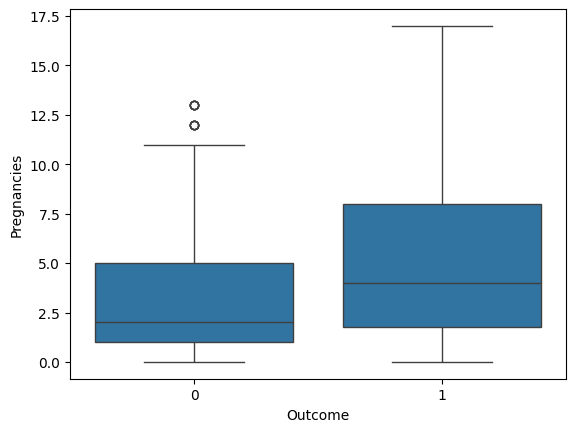

In [39]:
sns.boxplot(x="Outcome", y="Pregnancies", data=df)
plt.show()

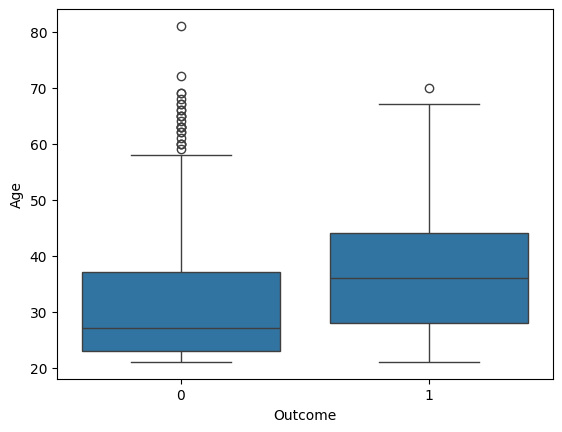

In [40]:
sns.boxplot(x="Outcome", y="Age", data=df)
plt.show()

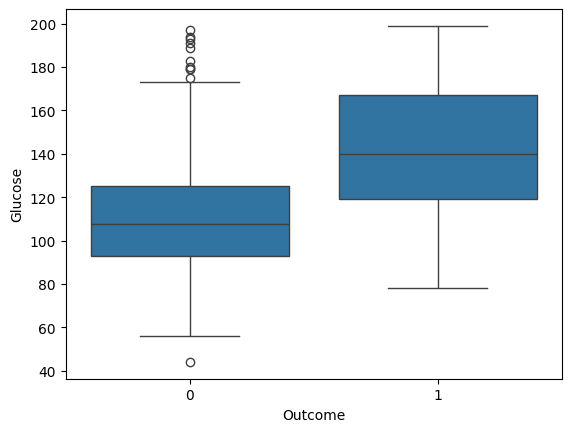

In [41]:
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.show()

#### Shows diabetics generally have higher glucose, BMI, and age

## Conclusion

- Glucose shows the strongest link with diabetes and is the most important predictor.
- BMI, Age, and Pregnancies also contribute significantly to diabetes risk.
- Several features had invalid zero values, which needed correction through imputation.
- The dataset is imbalanced, with fewer diabetic patients than non-diabetic ones.
- Overall, high glucose, high BMI, and older age are the key indicators of diabetes in this dataset.

# Feature Engineering

In [42]:
# Replace zero values with NaN
cols_with_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Fill NaN with median
for col in cols_with_zero:
    df[col] = df[col].fillna(df[col].median())


## Create New Categorical Features

In [43]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 30, 45, 60, 100],
    labels=['Young', 'Adult', 'MiddleAge', 'Senior']
)

In [44]:
df['BMI_Category'] = pd.cut(
    df['BMI'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)


In [45]:
df['Glucose_Level'] = pd.cut(
    df['Glucose'],
    bins=[0,99,125,200],
    labels=['Normal','Prediabetic','Diabetic']
)

## Create Interaction Features

In [46]:
df['Preg_Age_Interaction'] = df['Pregnancies'] * df['Age']

In [47]:
df['BMI_Glucose'] = df['BMI'] * df['Glucose']

In [48]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['Glucose','BloodPressure','BMI','Insulin','Age','SkinThickness']
scaler = StandardScaler()

df[scale_cols] = scaler.fit_transform(df[scale_cols])


# model training 

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- Prerequisite: df is from Step 1 (cleaned & engineered) ---
# (I'm assuming 'df' is the dataframe from the previous step)

# 3. One-Hot Encode Categorical Features
categorical_cols = ['AgeGroup', 'BMI_Category', 'Glucose_Level']
# Use pd.get_dummies, not LabelEncoder
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Define X and Y
Y = df_encoded["Outcome"]
X = df_encoded.drop("Outcome", axis=1)

# 5. Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# 6. Scale the data (CRITICAL: fit on train, transform both)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Step 2 Complete: Data correctly encoded, split, and scaled.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")

# --- Save for next steps ---
# We save the scaled arrays and Y-values
np.save('X_train_scaled.npy', X_train_scaled)
np.save('X_test_scaled.npy', X_test_scaled)
Y_train.to_csv('Y_train.csv', index=False)
Y_test.to_csv('Y_test.csv', index=False)

Step 2 Complete: Data correctly encoded, split, and scaled.
X_train_scaled shape: (614, 18)


In [62]:
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert categorical columns to numeric
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure same columns in train and test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Train model
model = LinearRegression()
model.fit(X_train, Y_train)

# Evaluate
accuracy = model.score(X_test, Y_test)
print("Linear Regression Accuracy:", accuracy)

Linear Regression Accuracy: 0.25016027091176896


In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=20)
model.fit(X_train, Y_train)
accuracy = model.score(X_test, Y_test)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.6428571428571429


/home/andriel/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 20 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=20).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)
accuracy = model.score(X_test, Y_test)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.7597402597402597


/home/andriel/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
accuracy = model.score(X_test, Y_test)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.6558441558441559


In [66]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, Y_train)
print("SVM Accuracy:", svm_model.score(X_test, Y_test))


SVM Accuracy: 0.7727272727272727


In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
print("Random Forest Accuracy:", rf_model.score(X_test, Y_test))

Random Forest Accuracy: 0.7597402597402597


## PCA

In [68]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
X_encoded = pd.get_dummies(X)  
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.28620074 0.21215968]


## hyperparameter

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # example estimator

# --- Load and Clean Data ---
df = pd.read_csv("diabetes.csv")
cols_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols_zero] = df[cols_zero].replace(0, np.nan).fillna(df[cols_zero].median())

# --- Feature Engineering ---
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,30,45,60,100], labels=['Young','Adult','MiddleAge','Senior'])
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])
df['Glucose_Level'] = pd.cut(df['Glucose'], bins=[0,99,125,200], labels=['Normal','Prediabetic','Diabetic'])
df = pd.get_dummies(df, columns=['AgeGroup','BMI_Category','Glucose_Level'], drop_first=True)

# --- Prepare Data ---
X = df.drop("Outcome", axis=1)
Y = df["Outcome"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Hyperparameter Tuning Example ---
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [None,5,10],
    'min_samples_split': [2,5,10]
}

# --- GridSearchCV ---
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, Y_train)
print("GridSearchCV Best Score:", grid_search.best_score_)
print("GridSearchCV Best Params:", grid_search.best_params_)

# --- RandomizedSearchCV ---
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, n_iter=5, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train_scaled, Y_train)
print("RandomizedSearchCV Best Score:", random_search.best_score_)
print("RandomizedSearchCV Best Params:", random_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV Best Score: 0.7753298680527789
GridSearchCV Best Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
RandomizedSearchCV Best Score: 0.7753032120485138
RandomizedSearchCV Best Params: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}
